_____________________Removing Columns with High percentage of Missing Values_____________________________
Columns to be removed (4): ['d', 'j', 'x', 'z']
0
_____________________Checking Data for Duplicates_____________________________
_____________________Imputing Missing Values_____________________________
_____________________Removing Ouliers_____________________________


d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 1\Scripts\data_preprocessor.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  messy_data_impute[col].fillna(messy_data_impute[col].mode()[0], inplace=True)  #if the col has objects,replace any missing in the column with mode of the col
d:\VSCode ProjectsRepos\BINF-5007-Materials\Assignment 1\Scripts\data_preprocessor.py:83: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will 

_____________________Encoding and Normalizing the Data_____________________________
_____________________Removing Redunant Features_____________________________
                      target         b         c         f         h  \
target              1.000000  0.070964  0.287662  0.009039  0.226929   
b                   0.070964  1.000000  0.053770  0.028758  0.017855   
c                   0.287662  0.053770  1.000000  0.035660  0.081308   
f                   0.009039  0.028758  0.035660  1.000000  0.024586   
h                   0.226929  0.017855  0.081308  0.024586  1.000000   
k                   0.008440  0.081827  0.039231  0.001395  0.074342   
l                   0.020255  0.010849  0.068618  0.029221  0.024354   
n                   0.385670  0.068339  0.338609  0.012282  0.210134   
o                   0.372134  0.038746  0.351926  0.012603  0.193505   
p                   0.399135  0.045219  0.365200  0.021384  0.215739   
q                   0.365514  0.040700  0.35598

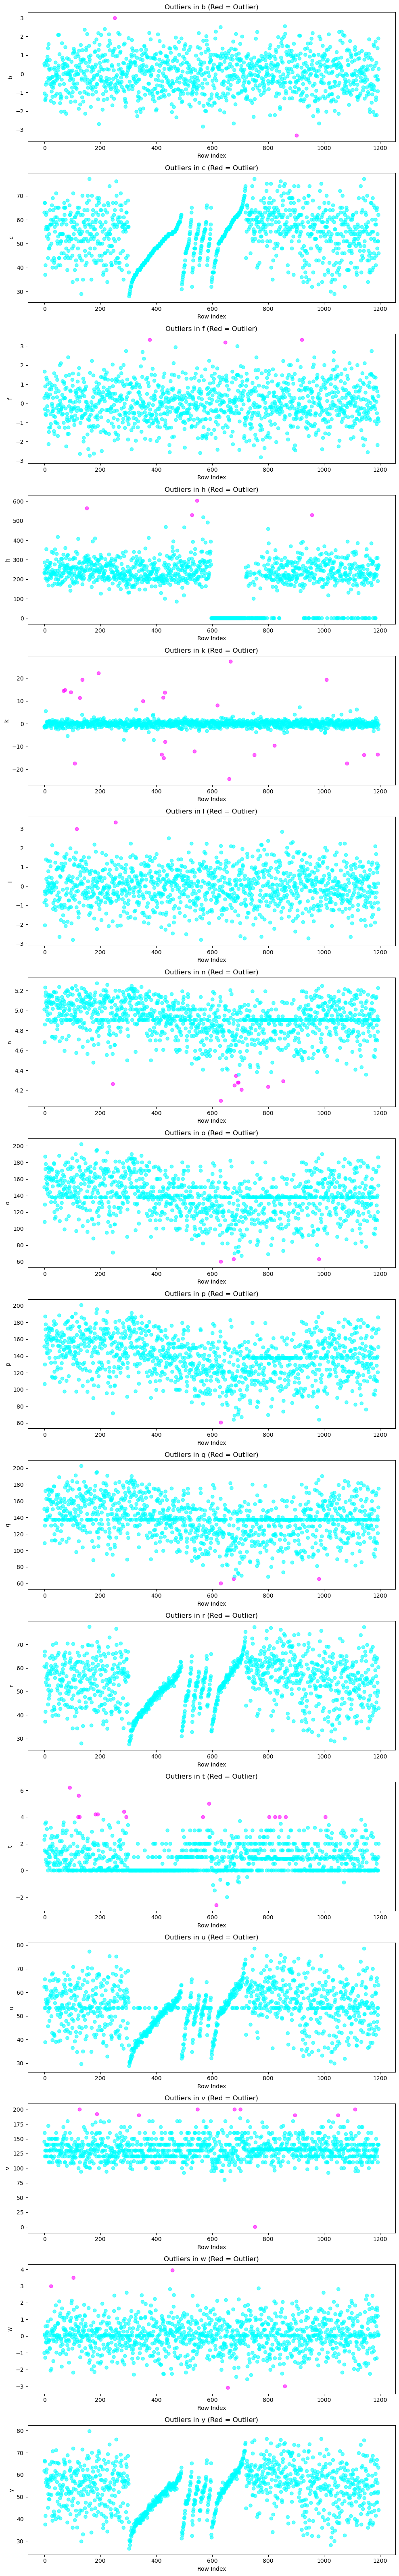

In [2]:
# Import necessary modules
import data_preprocessor as dp
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load the dataset
messy_data = pd.read_csv('D:/VSCode ProjectsRepos/BINF-5007-Materials/Assignment 1/Data/messy_data.csv')
clean_data = messy_data.copy()
#clean_data.info()


# 2. Preprocess the data

clean_data = dp.remove_cols_percent_missing(clean_data, percent_missing= 50)
clean_data = dp.remove_duplicates(clean_data)
clean_data = dp.impute_missing_values(clean_data, strategy='mean')
clean_data = dp.remove_outliers(clean_data)
clean_data = dp.normalize_data(clean_data)
clean_data = dp.remove_redundant_features(clean_data)



# 3. Save the cleaned dataset
clean_data.to_csv('../Data/clean_data.csv', index=False)
#clean_data.info()
#clean_data.head()
#clean_data.describe()

# 4. Train and evaluate the model
dp.simple_model(clean_data)





In [ ]:

#print(messy_data.head())


print(clean_data.isnull().sum())